In [14]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('/Users/danaosovtsova/work/neuro/testcolor.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

Z = img.reshape((-1,3))
Z = np.float32(Z)
 
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
 
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

res2_rgb = cv.cvtColor(res2, cv.COLOR_BGR2RGB)
 

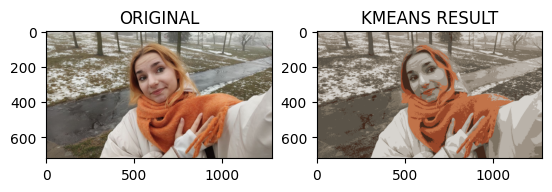

In [15]:
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('ORIGINAL')

plt.subplot(1, 2, 2)
plt.imshow(res2_rgb)
plt.title('KMEANS RESULT')

plt.show()

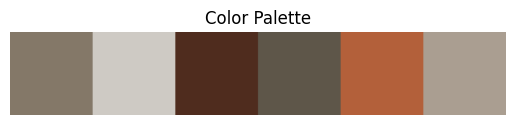

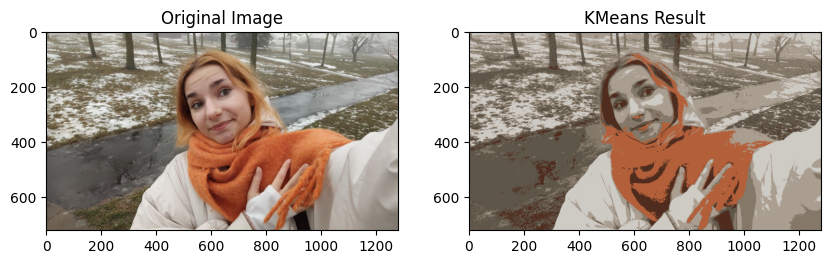

In [7]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Загрузка и преобразование изображения
img = cv.imread('/Users/danaosovtsova/work/neuro/testcolor.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Подготовка для KMeans
Z = img_rgb.reshape((-1, 3))
Z = np.float32(Z)

# Определение критериев и количества кластеров K
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 6  # Количество кластеров
ret, label, center = cv.kmeans(Z, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Преобразование центра кластеров в uint8
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

# Функция для вывода палитры
def plot_color_palette(colors):
    palette = np.zeros((50, 300, 3), dtype=np.uint8)
    step = 300 // len(colors)
    for i, color in enumerate(colors):
        palette[:, i * step:(i + 1) * step] = color
    plt.imshow(palette)
    plt.axis('off')
    plt.title('Color Palette')
    plt.show()

# Вывод цветовой палитры
plot_color_palette(center)

# Отображение оригинального и результирующего изображения
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(res2)
plt.title('KMeans Result')

plt.show()

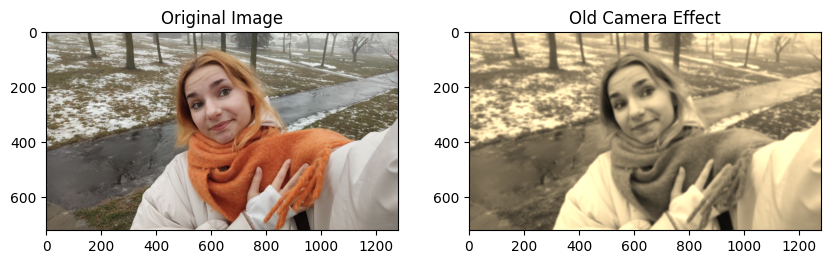

In [6]:
#old camera effect
import cv2
import numpy as np
from matplotlib import pyplot as plt

def apply_old_camera_effect(image):
    # Применение градиентного размытия
    blurred = cv2.GaussianBlur(image, (15, 15), 0)

    # Применение эффекта зернистости
    noise = np.random.normal(0, 0, image.shape).astype(np.uint8)
    noisy_image = cv2.add(blurred, noise)

    # Применение цветового фильтра (сепия)
    sepia_filter = np.array([[0.272, 0.534, 0.131],
                              [0.349, 0.686, 0.168],
                              [0.393, 0.769, 0.189]])
    old_camera_image = cv2.transform(noisy_image, sepia_filter)

    # Обрезка для избежания переполнения
    old_camera_image = np.clip(old_camera_image, 0, 255).astype(np.uint8)

    return old_camera_image

# Загрузка изображения
img = cv2.imread('/Users/danaosovtsova/work/neuro/testcolor.jpg')  
img_rgb_2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Применение эффекта старой камеры
old_camera_image = apply_old_camera_effect(img)
old_camera_image_rgb = cv2.cvtColor(old_camera_image, cv2.COLOR_BGR2RGB)

# Отображение оригинального и обработанного изображения
cv2.imshow('Original Image', img)
cv2.imshow('Old Camera Effect', old_camera_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb_2)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(old_camera_image_rgb)
plt.title('Old Camera Effect')
plt.show()

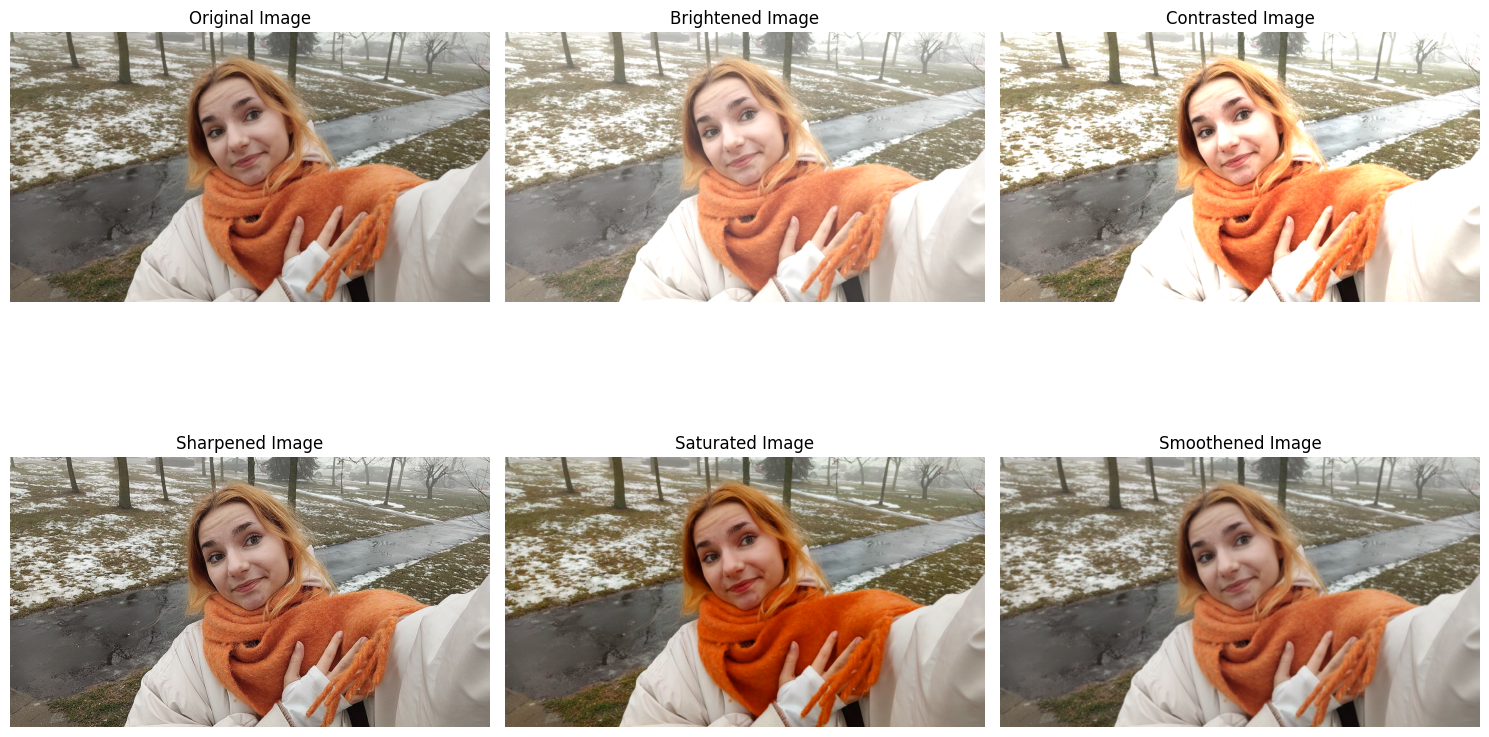

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_brightness(image, beta):
    return cv2.convertScaleAbs(image, alpha=1, beta=beta)

def adjust_contrast(image, alpha):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=0)

def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

def adjust_saturation(image, saturation_scale):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv[:, :, 1] = np.clip(hsv[:, :, 1] * saturation_scale, 0, 255)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

def smooth_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# Загрузка изображения
image = cv2.imread('/Users/danaosovtsova/work/neuro/testcolor.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

# Применение эффектов
bright_image = adjust_brightness(image, 50)
contrast_image = adjust_contrast(image, 1.5)
sharpened_image = sharpen_image(image)
saturated_image = adjust_saturation(image, 1.5)
smoothened_image = smooth_image(image)

# Отображение оригинального изображения и обработанных эффектов
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(bright_image)
plt.title('Brightened Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(contrast_image)
plt.title('Contrasted Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(sharpened_image)
plt.title('Sharpened Image')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(saturated_image)
plt.title('Saturated Image')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(smoothened_image)
plt.title('Smoothened Image')
plt.axis('off')

plt.tight_layout()
plt.show()